In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
# import load model and save model
from tensorflow.keras.models import load_model, save_model, model_from_json, model_from_yaml
import os
import random
import time

2024-03-22 09:30:58.772783: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-22 09:30:58.772837: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-22 09:30:58.773883: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-22 09:30:58.786018: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-22 09:31:00.208574: W tensorflow/compiler/tf2

In [3]:
# load the pictures from clothes folder
clothes_folder = os.path.join("/home/umermansoor/Downloads/ml1_internship/ecommerce_scraping/modivo.pl/predicted/done/0")
# list the files in the folder
clothes_files = os.listdir(clothes_folder)
# print the list of files
print(f"Total clothes files: {len(clothes_files)}")

# load the pictures from models folder
modelsfolder = os.path.join("/home/umermansoor/Downloads/ml1_internship/ecommerce_scraping/modivo.pl/predicted/done/1")
# list the files in the folder
modelsfiles = os.listdir(modelsfolder)
# print the list of files
print(f"Total models files: {len(modelsfiles)}")


# load the pictures from trash folder
trashfolder = os.path.join("/home/umermansoor/Downloads/ml1_internship/ecommerce_scraping/modivo.pl/predicted/done/2")
# list the files in the folder
trashfiles = os.listdir(trashfolder)
# print the list of files
print(f"Total trash files: {len(trashfiles)}")

Total clothes files: 568
Total models files: 568
Total trash files: 1838


In [4]:
# now store the images in a list, their paths in a list and assign them label 0
images = []
images_path = []
labels = []
for file in clothes_files:
    images_path.append(os.path.join(clothes_folder, file))
    images.append(tf.keras.preprocessing.image.load_img(os.path.join(clothes_folder, file), target_size=(227, 227)))
    labels.append(0)


for file in modelsfiles:
    images_path.append(os.path.join(modelsfolder, file))
    images.append(tf.keras.preprocessing.image.load_img(os.path.join(modelsfolder, file), target_size=(227, 227)))
    labels.append(1)
    
    
for file in trashfiles:
    images_path.append(os.path.join(trashfolder, file))
    images.append(tf.keras.preprocessing.image.load_img(os.path.join(trashfolder, file), target_size=(227, 227)))
    labels.append(2)

In [5]:
# create a csv using these lists 
import pandas as pd 
data = {'Images': images, 'Labels': labels, 'Images Path': images_path}
df = pd.DataFrame(data)
df.to_csv('images.csv', index=False)
# now load the csv
df = pd.read_csv('images.csv')
# print the dataframe
df.head()

,Images,Labels,Images Path
0,<PIL.Image.Image image mode=RGB size=227x227 a...,0,/home/umermansoor/Downloads/ml1_internship/eco...
1,<PIL.Image.Image image mode=RGB size=227x227 a...,0,/home/umermansoor/Downloads/ml1_internship/eco...
2,<PIL.Image.Image image mode=RGB size=227x227 a...,0,/home/umermansoor/Downloads/ml1_internship/eco...
3,<PIL.Image.Image image mode=RGB size=227x227 a...,0,/home/umermansoor/Downloads/ml1_internship/eco...
4,<PIL.Image.Image image mode=RGB size=227x227 a...,0,/home/umermansoor/Downloads/ml1_internship/eco...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2974 entries, 0 to 2973
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Images       2974 non-null   object
 1   Labels       2974 non-null   int64 
 2   Images Path  2974 non-null   object
dtypes: int64(1), object(2)
memory usage: 69.8+ KB


In [7]:
# shuffle the dataset 
df = df.sample(frac=1).reset_index(drop=True)
# print the dataframe
df.head()

,Images,Labels,Images Path
0,<PIL.Image.Image image mode=RGB size=227x227 a...,1,/home/umermansoor/Downloads/ml1_internship/eco...
1,<PIL.Image.Image image mode=RGB size=227x227 a...,2,/home/umermansoor/Downloads/ml1_internship/eco...
2,<PIL.Image.Image image mode=RGB size=227x227 a...,2,/home/umermansoor/Downloads/ml1_internship/eco...
3,<PIL.Image.Image image mode=RGB size=227x227 a...,1,/home/umermansoor/Downloads/ml1_internship/eco...
4,<PIL.Image.Image image mode=RGB size=227x227 a...,0,/home/umermansoor/Downloads/ml1_internship/eco...


In [9]:
# now we will load the model finetuned.keras 
model = load_model("/home/umermansoor/Downloads/ml1_internship/ecommerce_scraping/finetuned.keras")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 217, 217, 96)      34944     
                                                                 
 max_pooling2d (MaxPooling2  (None, 72, 72, 96)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 68, 68, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 22, 22, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 384)       885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 18, 18, 384)       1

In [10]:
# now we will train this model again on our dataset
# first we will split the dataset into train and test
from sklearn.model_selection import train_test_split
# given the image, we have to predict the label
X = df['Images Path']
y = df['Labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# print the shape of the train and test sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2379,) (595,) (2379,) (595,)


In [11]:
# now we will create a data generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# create a data generator
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
# create a train generator
train_generator = datagen.flow_from_dataframe(df, x_col='Images Path', y_col='Labels', subset='training', target_size=(227, 227), class_mode='raw')
# create a validation generator
val_generator = datagen.flow_from_dataframe(df, x_col='Images Path', y_col='Labels', subset='validation', target_size=(227, 227), class_mode='raw')
# now we will train the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator, validation_data=val_generator, epochs=10)


Found 2380 validated image filenames.
Found 594 validated image filenames.
Epoch 1/10
75/75 [==============================] - 675s 9s/step - loss: 0.5022 - accuracy: 0.8311 - val_loss: 0.4170 - val_accuracy: 0.8620
Epoch 2/10
75/75 [==============================] - 726s 10s/step - loss: 0.4428 - accuracy: 0.8458 - val_loss: 0.3591 - val_accuracy: 0.8923
Epoch 3/10
75/75 [==============================] - 614s 8s/step - loss: 0.4123 - accuracy: 0.8517 - val_loss: 0.3537 - val_accuracy: 0.8956
Epoch 4/10
75/75 [==============================] - 620s 8s/step - loss: 0.3807 - accuracy: 0.8660 - val_loss: 0.3972 - val_accuracy: 0.8620
Epoch 5/10
75/75 [==============================] - 572s 8s/step - loss: 0.3672 - accuracy: 0.8672 - val_loss: 0.3371 - val_accuracy: 0.8788
Epoch 6/10
75/75 [==============================] - 555s 7s/step - loss: 0.3203 - accuracy: 0.8777 - val_loss: 0.3072 - val_accuracy: 0.8855
Epoch 7/10
75/75 [==============================] - 549s 7s/step - loss: 0.302

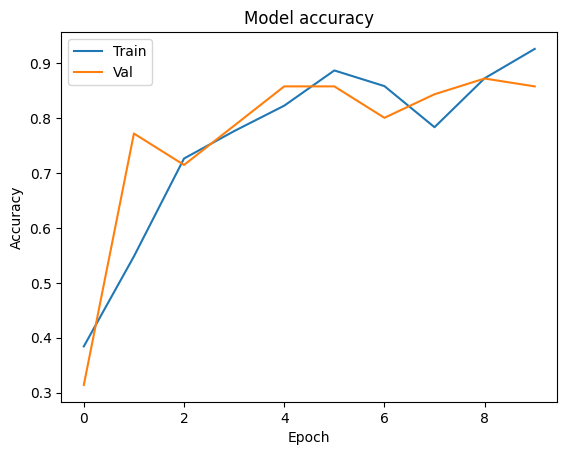

In [24]:
# plot the training and validation accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

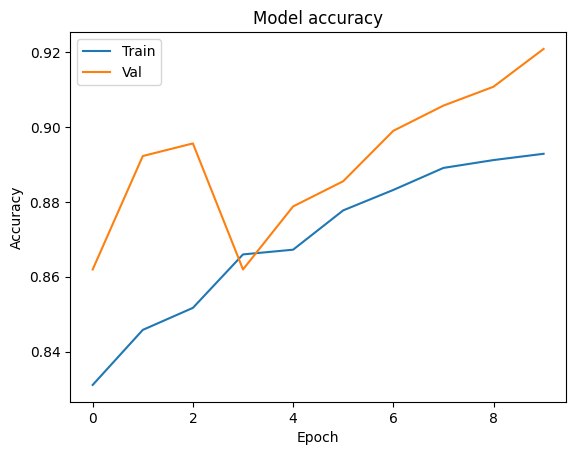

In [12]:
# plot the training and validation accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [42]:
# take a picture and test it 
pic = cv2.imread('hello.jpg')
pic = cv2.cvtColor(pic, cv2.COLOR_BGR2RGB)
pic = cv2.resize(pic, (227, 227))
pic = np.array(pic)
pic = np.expand_dims(pic, axis=0)
#print(pic)

# now we will predict the class of the image
prediction = model.predict(pic)
print(prediction)
# get the class with the highest probability
print(np.argmax(prediction))

1/1 [==============================] - 0s 128ms/step
[[0. 1. 0.]]
1


In [43]:
# save the model and history 
model.save('finetuned.keras')
import pickle
with open('history.pkl', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)